<a href="https://colab.research.google.com/github/MithilMallya4121/AppAE/blob/main/efficient_frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Effecient Frontier

In [ ]:
import pandas as pd

ind = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ind49_m_ew_rets.csv", header=0, index_col=0, parse_dates=True)/100

/tmp/ipython-input-88-3029955829.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ind49_m_ew_rets.csv", header=0, index_col=0, parse_dates=True)/100


In [ ]:
ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
192607,0.0264,0.0073,-0.9999,-0.0536,0.0167,0.0865,0.0125,0.5021,0.0245,-0.0068,...,0.0129,-0.0079,-0.2023,0.0178,0.0169,0.0496,-0.0094,0.0714,-0.0526,0.0261
192608,0.0037,0.0395,-0.9999,0.1925,0.0501,0.1681,0.0015,0.4298,-0.0286,0.0479,...,0.0400,0.0512,0.0942,-0.0045,-0.0090,0.3423,0.0105,0.0302,-0.0144,0.0348
192609,-0.0315,0.0172,-0.9999,0.0563,0.0310,0.0833,0.0343,-0.0491,0.0176,-0.0616,...,-0.0664,-0.0004,0.0032,-0.0087,-0.0014,-0.0125,-0.0007,-0.0174,-0.0580,-0.0018
192610,0.0055,-0.0509,-0.9999,-0.0608,-0.0163,-0.0140,-0.0649,0.0537,-0.0298,-0.0112,...,-0.0490,-0.0239,-0.0621,-0.0333,-0.0205,-0.1113,-0.0346,-0.0372,-0.0039,-0.0639
192611,-0.0857,0.0789,-0.9999,0.1129,0.0958,0.0000,0.0033,-0.0640,0.0165,0.0085,...,0.0260,0.0039,-0.0026,0.0134,0.0192,-0.0370,0.0179,-0.0008,0.0067,-0.0041


In [ ]:
ind.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812],
      dtype='int64', length=1110)

In [ ]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [ ]:
ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07,0.0264,0.0073,-0.9999,-0.0536,0.0167,0.0865,0.0125,0.5021,0.0245,-0.0068,...,0.0129,-0.0079,-0.2023,0.0178,0.0169,0.0496,-0.0094,0.0714,-0.0526,0.0261
1926-08,0.0037,0.0395,-0.9999,0.1925,0.0501,0.1681,0.0015,0.4298,-0.0286,0.0479,...,0.0400,0.0512,0.0942,-0.0045,-0.0090,0.3423,0.0105,0.0302,-0.0144,0.0348
1926-09,-0.0315,0.0172,-0.9999,0.0563,0.0310,0.0833,0.0343,-0.0491,0.0176,-0.0616,...,-0.0664,-0.0004,0.0032,-0.0087,-0.0014,-0.0125,-0.0007,-0.0174,-0.0580,-0.0018
1926-10,0.0055,-0.0509,-0.9999,-0.0608,-0.0163,-0.0140,-0.0649,0.0537,-0.0298,-0.0112,...,-0.0490,-0.0239,-0.0621,-0.0333,-0.0205,-0.1113,-0.0346,-0.0372,-0.0039,-0.0639
1926-11,-0.0857,0.0789,-0.9999,0.1129,0.0958,0.0000,0.0033,-0.0640,0.0165,0.0085,...,0.0260,0.0039,-0.0026,0.0134,0.0192,-0.0370,0.0179,-0.0008,0.0067,-0.0041


In [ ]:
ind.columns

Index(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ',
       'Other'],
      dtype='object')

In [ ]:
ind.columns = ind.columns.str.strip() #to remove embedded spaces

In [ ]:
ind.columns

Index(['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin',
       'Other'],
      dtype='object')

In [ ]:
ind.shape

(1110, 49)

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import mithil_risk_kit as mrk

In [ ]:
ind = mrk.get_ind_returns()

ValueError: time data "0" doesn't match format "%Y%m", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07,0.0264,0.0073,-0.9999,-0.0536,0.0167,0.0865,0.0125,0.5021,0.0245,-0.0068,...,0.0129,-0.0079,-0.2023,0.0178,0.0169,0.0496,-0.0094,0.0714,-0.0526,0.0261
1926-08,0.0037,0.0395,-0.9999,0.1925,0.0501,0.1681,0.0015,0.4298,-0.0286,0.0479,...,0.0400,0.0512,0.0942,-0.0045,-0.0090,0.3423,0.0105,0.0302,-0.0144,0.0348
1926-09,-0.0315,0.0172,-0.9999,0.0563,0.0310,0.0833,0.0343,-0.0491,0.0176,-0.0616,...,-0.0664,-0.0004,0.0032,-0.0087,-0.0014,-0.0125,-0.0007,-0.0174,-0.0580,-0.0018
1926-10,0.0055,-0.0509,-0.9999,-0.0608,-0.0163,-0.0140,-0.0649,0.0537,-0.0298,-0.0112,...,-0.0490,-0.0239,-0.0621,-0.0333,-0.0205,-0.1113,-0.0346,-0.0372,-0.0039,-0.0639
1926-11,-0.0857,0.0789,-0.9999,0.1129,0.0958,0.0000,0.0033,-0.0640,0.0165,0.0085,...,0.0260,0.0039,-0.0026,0.0134,0.0192,-0.0370,0.0179,-0.0008,0.0067,-0.0041


In [ ]:
ind = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ind30_m_vw_rets.csv")

In [ ]:
ind.index

RangeIndex(start=0, stop=1110, step=1)

In [ ]:
ind.index = ind.index.to_timestamp().to_period('M')

In [ ]:
ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07,0.0264,0.0073,-0.9999,-0.0536,0.0167,0.0865,0.0125,0.5021,0.0245,-0.0068,...,0.0129,-0.0079,-0.2023,0.0178,0.0169,0.0496,-0.0094,0.0714,-0.0526,0.0261
1926-08,0.0037,0.0395,-0.9999,0.1925,0.0501,0.1681,0.0015,0.4298,-0.0286,0.0479,...,0.0400,0.0512,0.0942,-0.0045,-0.0090,0.3423,0.0105,0.0302,-0.0144,0.0348
1926-09,-0.0315,0.0172,-0.9999,0.0563,0.0310,0.0833,0.0343,-0.0491,0.0176,-0.0616,...,-0.0664,-0.0004,0.0032,-0.0087,-0.0014,-0.0125,-0.0007,-0.0174,-0.0580,-0.0018
1926-10,0.0055,-0.0509,-0.9999,-0.0608,-0.0163,-0.0140,-0.0649,0.0537,-0.0298,-0.0112,...,-0.0490,-0.0239,-0.0621,-0.0333,-0.0205,-0.1113,-0.0346,-0.0372,-0.0039,-0.0639
1926-11,-0.0857,0.0789,-0.9999,0.1129,0.0958,0.0000,0.0033,-0.0640,0.0165,0.0085,...,0.0260,0.0039,-0.0026,0.0134,0.0192,-0.0370,0.0179,-0.0008,0.0067,-0.0041


In [ ]:
import mithil_risk_kit as mrk

In [ ]:
ind = mrk.get_ind_returns()

/content/mithil_risk_kit.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ind30_m_vw_rets.csv",header=0, index_col=0, parse_dates=True)/100


In [ ]:
ind.shape

(1110, 30)

In [ ]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


<Axes: >

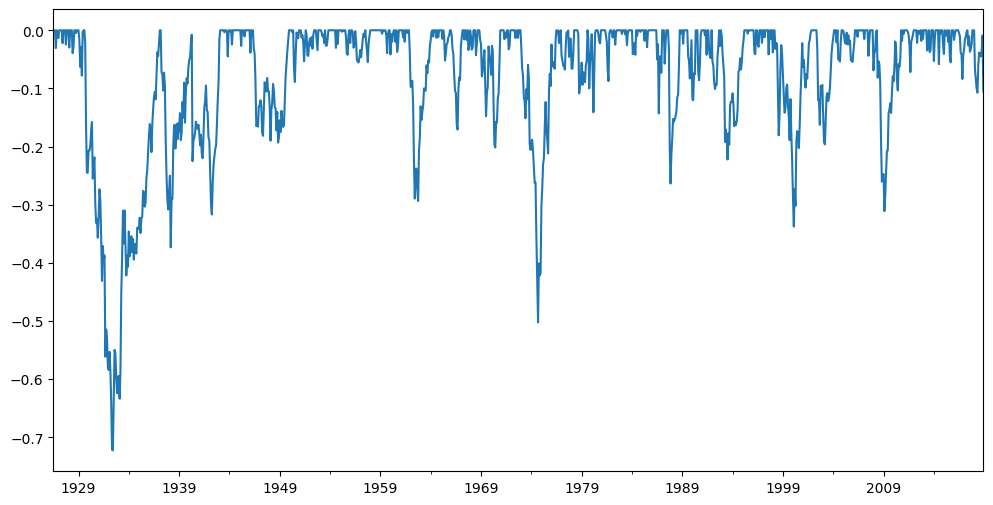

In [ ]:
mrk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [ ]:
cols_of_interest = ["Food","Smoke","Coal","Beer","Fin"]
mrk.var_gaussian(ind[cols_of_interest],modified = True)

,0
Food,0.061207
Smoke,0.080292
Coal,0.047359
Beer,0.033881
Fin,0.075199


In [ ]:
mrk.var_gaussian(ind,modified = True).sort_values().tail()

,0
Carry,0.094527
Meals,0.098403
BusEq,0.099377
Games,0.100701
Mines,0.102782


In [ ]:
mrk.var_gaussian(ind, modified = True).sort_values().head()

,0
Beer,0.033881
Coal,0.047359
Food,0.061207
Telcm,0.064719
Hshld,0.064886


<Axes: >

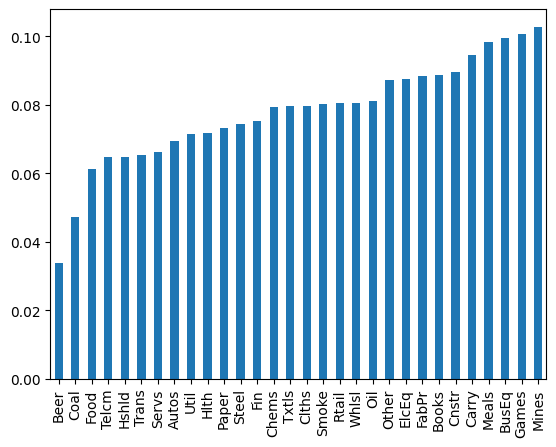

In [ ]:
mrk.var_gaussian(ind, modified = True).sort_values().plot.bar()

<Axes: >

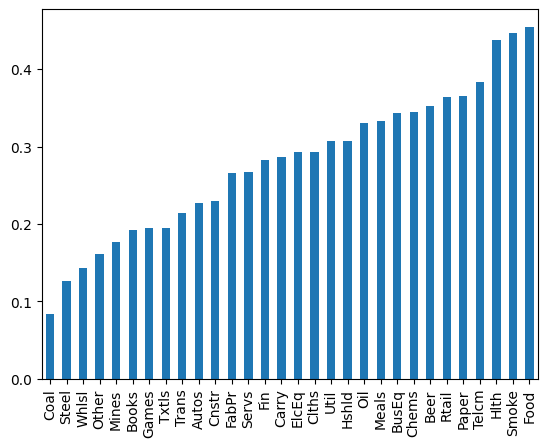

In [ ]:
mrk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar()

<Axes: title={'center': 'Industry Sharpe Ratios'}>

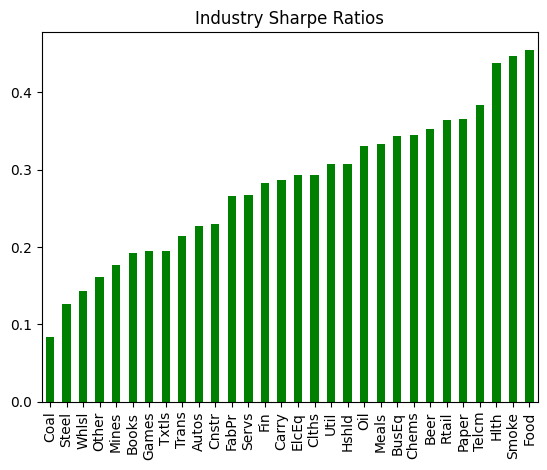

In [ ]:
mrk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios", color = "green")

<Axes: title={'center': 'Industry Sharpe Ratios from 2000'}>

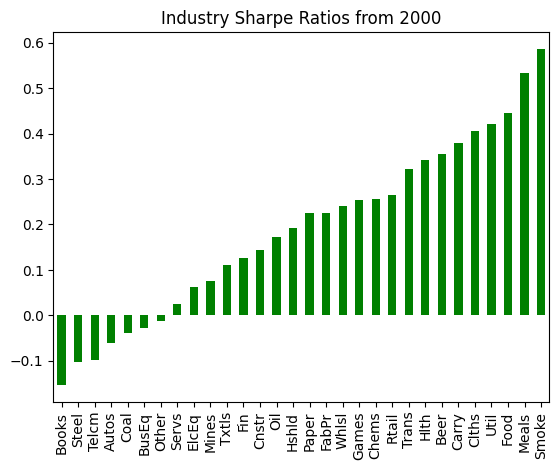

In [ ]:
mrk.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios from 2000", color = "green")

In [ ]:
#Two sets of values for efficient frontier, Covariance and Expected returns

In [ ]:
er = mrk.annualized_rets(ind["1995":"2000"],12)

<Axes: >

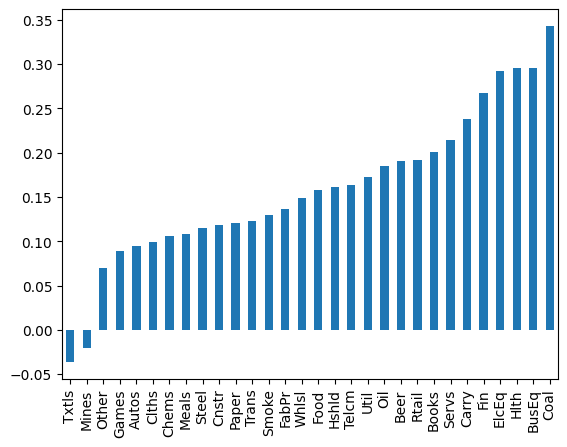

In [ ]:
er.sort_values().plot.bar()

In [ ]:
cov = ind["1995":"2000"].cov()

In [ ]:
cov.shape

(30, 30)

In [ ]:
cov.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
